In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)


from utils.constants import *
from utils.utils import *

In [3]:
data = pd.read_csv(get_absolute_path('Occupancy_Estimation.csv', 'data'))

In [4]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [5]:
data.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [29]:
data['S5_CO2_Slope'].describe()

count    10129.000000
mean        -0.004830
std          1.164990
min         -6.296154
25%         -0.046154
50%          0.000000
75%          0.000000
max          8.980769
Name: S5_CO2_Slope, dtype: float64

We have a dataset with various sensor readings and a target variable for room occupancy count. We want to perform some analysis or build a predictive model using this data, we can follow these steps:

1. Data Preprocessing:
    - Check for missing data: Ensure that there are no missing values in your dataset.
    - Data type conversion: Make sure that the data types of columns are appropriate. Date and time columns should be converted to datetime objects if they aren't already.
    - Feature scaling: Depending on the algorithms you plan to use, it may be necessary to scale or normalize your feature columns.
2. Exploratory Data Analysis (EDA):
    - Explore the distribution of your target variable 'Room_Occupancy_Count'.
    - Examine the distributions and statistics of your feature columns using visualizations and summary statistics.
3. Feature Engineering:
    - Extract relevant features if needed, such as day of the week, hour of the day, or other derived features from the date and time columns.
    - Consider encoding categorical variables if you have any.
4. Data Splitting:
    - Split your dataset into training and testing sets. This is essential for model evaluation.
5. Model Selection and Training:
    - Choose an appropriate machine learning or statistical model for your task. Since your task involves predicting room occupancy count, you may consider classification algorithms like logistic regression, decision trees, random forests, or gradient boosting.
    - Train your selected model on the training data.
6. Model Evaluation:
    - Evaluate your model's performance on the testing data using appropriate metrics for classification tasks. Common metrics include accuracy, precision, recall, F1-score, and ROC AUC.
    - You can also use techniques like cross-validation for a more robust evaluation.
7. Hyperparameter Tuning (Optional):
    - If applicable, perform hyperparameter tuning to optimize your model's performance.
8. Interpretation and Insights:
    - Interpret the results and understand the significance of the features in predicting room occupancy count.
    - Visualize feature importance if you're using a model that supports it (e.g., random forests).


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Convert Date and Time columns to datetime objects
data['Date'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Drop original Date and Time columns
data.drop(['Time'], axis=1, inplace=True)

# Feature columns and target variable
feature_cols = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
                'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
                'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
outcome_col = 'Room_Occupancy_Count'

# EDA - Explore the data (optional)
# For example, you can use data.describe() or data.hist() to visualize the distributions.

# Feature Engineering (if needed)

# Data Splitting
X = data[feature_cols]
y = data[outcome_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # time based split

# Feature Scaling (optional, but often beneficial for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [27]:
X_train.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')

### Random Forest

Accuracy: 0.998025666337611
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   1    0    1  138]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



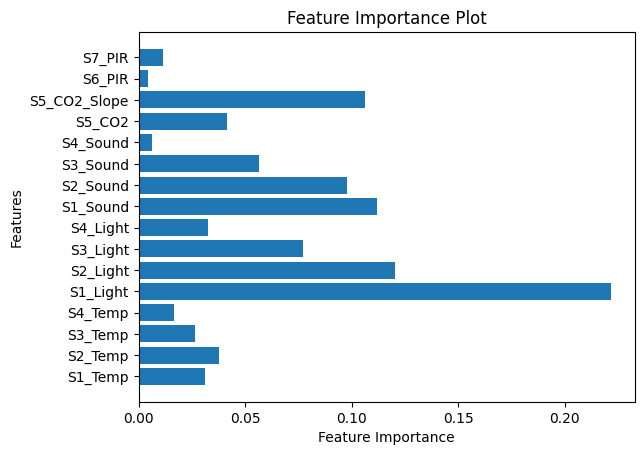

In [7]:
# With no special treatment
# Model Selection and Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance (if applicable)
feature_importance = clf.feature_importances_
plt.barh(feature_cols, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


In [8]:
y_test.value_counts()

Room_Occupancy_Count
0    1619
2     164
3     140
1     103
Name: count, dtype: int64

Imbalanced classes: 
  
- Room Occupancy Count 0: 1619 samples
- Room Occupancy Count 2: 164 samples
- Room Occupancy Count 3: 140 samples
- Room Occupancy Count 1: 103 samples

Accuracy: 0.9985192497532083
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  163    0]
 [   0    0    2  138]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       1.00      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



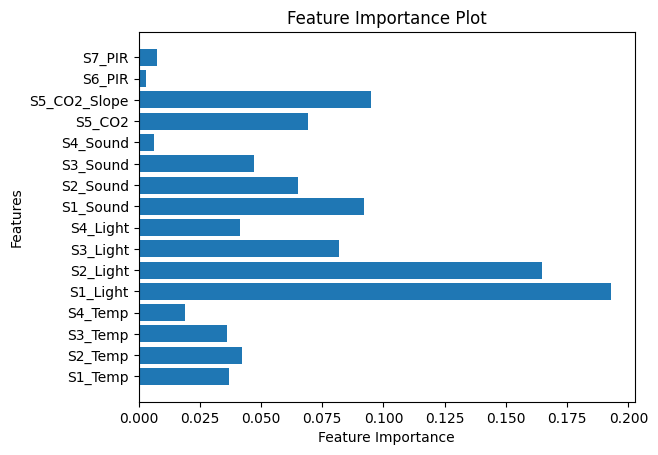

In [9]:
# Handle imbalance data using class_weights

# Handle Class Imbalance: Assign class weights
class_weights = {0: 1.0, 1: 5.0, 2: 3.0, 3: 4.0}  # Adjust these weights based on your dataset

# Model Selection and Training with class weights
clf = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance (if applicable)
feature_importance = clf.feature_importances_
plt.barh(feature_cols, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Accuracy: 0.9985192497532083
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   0    0    1  139]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      1.00      0.99      2026
weighted avg       1.00      1.00      1.00      2026



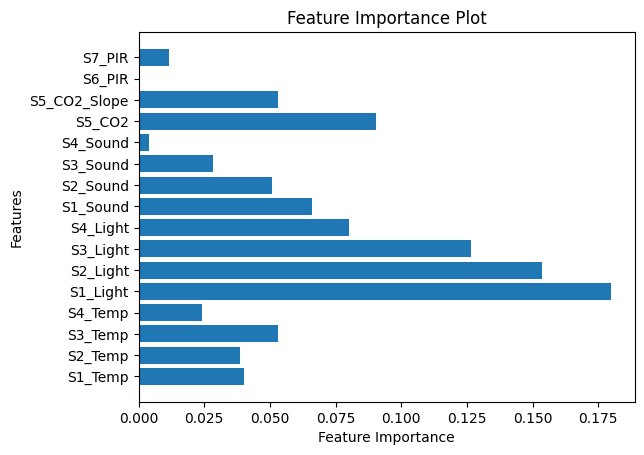

In [10]:
# Handle imbalance data using SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Selection and Training with resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance (if applicable)
feature_importance = clf.feature_importances_
plt.barh(feature_cols, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

### XGBoost

/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy: 0.9970384995064165
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   3    0    1  136]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.97      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



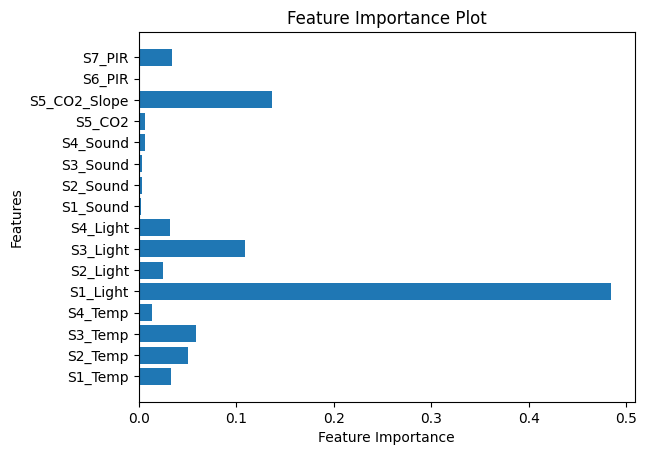

In [11]:
from xgboost import XGBClassifier
# Model Selection and Training with XGBoost
clf = XGBClassifier(random_state=42)  # Initialize XGBoost classifier
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance Plot (XGBoost provides built-in feature importance)
plt.barh(feature_cols, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:11:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9970384995064165
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   3    0    1  136]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.97      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



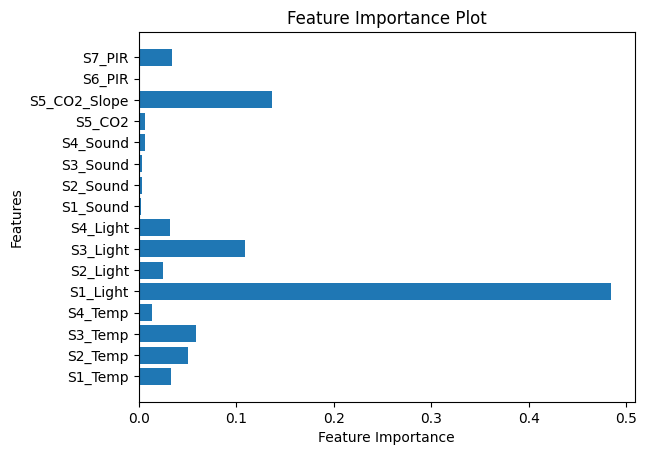

In [12]:
# Define class weights
class_weights = {0: 1.0, 1: 5.0, 2: 3.0, 3: 4.0}  # Adjust these weights based on your dataset

# Model Selection and Training with class weights in XGBoost
clf = XGBClassifier(random_state=42, scale_pos_weight=class_weights)  # Use scale_pos_weight to handle class imbalance
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance Plot (XGBoost provides built-in feature importance)
plt.barh(feature_cols, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Accuracy: 0.9985192497532083
Confusion Matrix:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   0    0    1  139]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      1.00      0.99      2026
weighted avg       1.00      1.00      1.00      2026



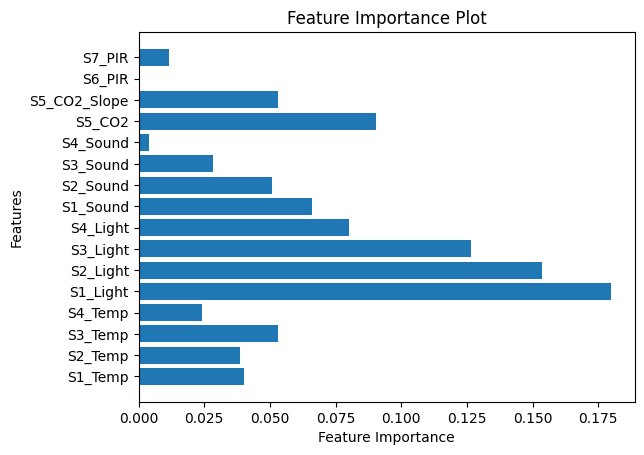

In [13]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Selection and Training with resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature Importance (if applicable)
feature_importance = clf.feature_importances_
plt.barh(feature_cols, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

### SVM

In [14]:
from sklearn.svm import SVC

# Model Selection and Training with SVM
clf = SVC(random_state=42)  # Initialize SVM classifier
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# SVM doesn't provide built-in feature importance, so you may not have a feature importance plot

Accuracy: 0.9921026653504442
Confusion Matrix:
[[1616    0    0    3]
 [   0  101    2    0]
 [   0    0  159    5]
 [   1    0    5  134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.96      0.97      0.96       164
           3       0.94      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



In [15]:
# Define class weights
class_weights = {0: 1.0, 1: 5.0, 2: 3.0, 3: 4.0}  # Adjust these weights based on your dataset

# Model Selection and Training with SVM and class weights
clf = SVC(random_state=42, class_weight=class_weights)  # Use class_weight to handle class imbalance
clf.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# SVM doesn't provide built-in feature importance, so you may not have a feature importance plot

Accuracy: 0.9930898321816387
Confusion Matrix:
[[1616    0    0    3]
 [   0  102    1    0]
 [   0    0  160    4]
 [   0    0    6  134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.99      1.00       103
           2       0.96      0.98      0.97       164
           3       0.95      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



In [16]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Selection and Training with resampled data using SVM
clf = SVC(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# SVM doesn't provide built-in feature importance, so you may not have a feature importance plot

Accuracy: 0.9945705824284304
Confusion Matrix:
[[1616    0    1    2]
 [   0  103    0    0]
 [   0    0  162    2]
 [   0    0    6  134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      1.00      1.00       103
           2       0.96      0.99      0.97       164
           3       0.97      0.96      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.99      0.98      2026
weighted avg       0.99      0.99      0.99      2026



### Visualization of Metrics

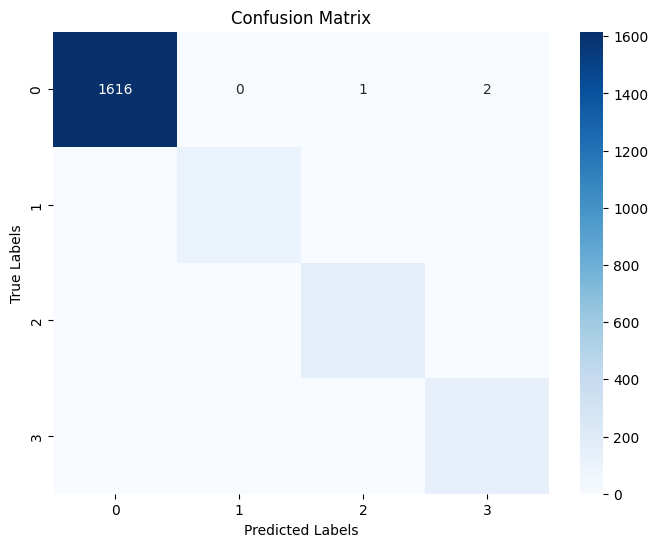

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is the confusion matrix for your multi-class model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [18]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      1.00      1.00       103
           2       0.96      0.99      0.97       164
           3       0.97      0.96      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.99      0.98      2026
weighted avg       0.99      0.99      0.99      2026



In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Macro-average
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Micro-average
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')


In [20]:
macro_precision

0.982398593602607

### Poisson Regression

In [21]:
import statsmodels.api as sm
# Fit a Poisson regression model
poisson_model = sm.GLM(y_train, sm.add_constant(X_train_scaled), family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Print the summary of the Poisson regression model
print(poisson_results.summary())

# Make predictions on the test set
X_test_with_const = sm.add_constant(X_test_scaled)
poisson_predictions = poisson_results.predict(X_test_with_const)

# Evaluate the Poisson regression model (you may need to adjust the threshold for classification)
threshold = 0.5  # Adjust the threshold based on your problem
y_pred = (poisson_predictions > threshold).astype(int)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Room_Occupancy_Count   No. Observations:                 8103
Model:                              GLM   Df Residuals:                     8086
Model Family:                   Poisson   Df Model:                           16
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2879.5
Date:                  Sun, 17 Sep 2023   Deviance:                       1863.2
Time:                          17:11:34   Pearson chi2:                 2.12e+03
No. Iterations:                       6   Pseudo R-squ. (CS):             0.6848
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6735      0.051

/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yinpuli/Documents/python-projects/room-occupancy-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [22]:
# # Bayesian Poisson

# import pymc3 as pm

# # Bayesian Poisson Regression Model
# with pm.Model() as poisson_model:
#     # Priors for coefficients
#     alpha = pm.Normal('alpha', mu=0, sd=10)
#     beta = pm.Normal('beta', mu=0, sd=10, shape=len(feature_cols))
    
#     # Expected value (lambda) of Poisson distribution
#     lambda_ = pm.math.exp(alpha + pm.math.dot(X_train_scaled, beta))
    
#     # Likelihood (Poisson distribution)
#     y_observed = pm.Poisson('y_observed', mu=lambda_, observed=y_train)
    
#     # Sample from the posterior distribution
#     trace = pm.sample(1000, tune=1000, chains=2, cores=2)

# # Bayesian Inference
# pm.summary(trace)
# pm.plot_trace(trace)
# pm.plot_posterior(trace)

# # Predictions on the test set
# with poisson_model:
#     lambda_pred = pm.math.exp(trace['alpha'] + np.dot(X_test_scaled, trace['beta'].T))

# # Use the posterior samples to make predictions on the test set
# lambda_pred = np.exp(trace['alpha'] + np.dot(X_test_scaled, trace['beta'].T))

# # Calculate the mean and credible interval (e.g., 95% interval) for predictions
# mean_pred = lambda_pred.mean(axis=0)
# cred_interval = np.percentile(lambda_pred, [2.5, 97.5], axis=0)

# # Print the mean predictions and credible intervals
# for i, feature_set in enumerate(X_test_scaled):
#     print(f"Sample {i + 1}:")
#     print(f"Mean Prediction: {mean_pred[i]:.2f}")
#     print(f"95% Credible Interval: [{cred_interval[0, i]:.2f}, {cred_interval[1, i]:.2f}]")

# # Visualize the results or make further predictions as needed

### LSTM

In [23]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(window_size, len(feature_cols)), activation='relu'))
# model.add(Dense(1))  # Output layer for regression

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Data: {loss}')
